<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import squarify

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [2]:
from bs4 import BeautifulSoup
import requests

url = 'https://raw.githubusercontent.com/shmilyface/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv'

df = pd.read_csv(url)

result = requests.get(url)

In [3]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
def soupify(x):
    ''' takes code, parses using bs4, general cleanse, returns code'''
    x = eval(x).decode()
    x = BeautifulSoup(x, 'html.parser').get_text()
    x = re.sub(r"\r?\n", ' ', x)
    return x

In [5]:
df['description'] = [soupify(x['description']) for _, x in df.iterrows()]

In [6]:
import re

def strip_html(text):
    ''' strips text of pesky html tags'''
    strip = re.sub("b'", '', text)
    strip = re.sub('b"', '', text)
    strip = re.sub("\n", ' ', text)
    strip = re.sub('–', '', text)
    return strip

In [7]:
#lowercase
df['description'] = df['description'].apply(lambda x: x.lower())

In [8]:
df.head()

,Unnamed: 0,description,title
0,0,job requirements: conceptual understanding in ...,Data scientist
1,1,"job description as a data scientist 1, you wi...",Data Scientist I
2,2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist
4,4,location: usa – multiple locations 2+ years of...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [9]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [10]:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
df['tokens'] =tokens

In [11]:
df['tokens'].head()

0    [job, requirements:, conceptual, understanding...
1    [job, description,  , as, a, data, scientist, ...
2    [as, a, data, scientist, you, will, be, workin...
3    [$4,969, -, $6,756, a, monthcontractunder, the...
4    [location:, usa, –, multiple, locations, 2+, y...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

#learn
vect.fit(df['description'])

#sparse dtm
dtm = vect.transform(df['description'])
#to df
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich,ﬁeld,ﬁnd,ﬁndings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [13]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('and', 11548),
 ('to', 6808),
 ('the', 5512),
 ('of', 4545),
 ('data', 3914),
 ('a', 3574),
 ('in', 3554),
 ('with', 3056),
 (' ', 2225),
 ('for', 2035)]

In [14]:
def count(docs):
        #create counters
        word_counts = Counter()
        appears_in = Counter()
        #length of docs/x
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc)) #? (stating its in a set w/in doc?)
        #creates a temp dictionary with word counts
        temp = zip(word_counts.keys(), word_counts.values())
        #creates wc df with columns word, and count
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        #add column named rank, method=first
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
        #create a function to do word/ total sum variable made above
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        #sort values by rank
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()
        # ^cum. sum of percent total, v create zip of appears_in Counter
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [15]:
wc = count(df['tokens'])

In [16]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
63,and,425,11548,1.0,0.055214,0.055214,0.997653
85,to,422,6808,2.0,0.032551,0.087765,0.990610
355,the,414,5512,3.0,0.026354,0.114120,0.971831
12,of,420,4545,4.0,0.021731,0.135851,0.985915
1,data,421,3914,5.0,0.018714,0.154564,0.988263


In [17]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data', ' ',])

In [18]:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [19]:
wc = count(df['tokens'])

In [20]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
68,experience,401,1668,1.0,0.012805,0.012805,0.941315
0,work,350,1063,2.0,0.008161,0.020966,0.821596
80,business,303,1052,3.0,0.008076,0.029042,0.711268
116,team,325,787,4.0,0.006042,0.035084,0.762911
35,learning,271,676,5.0,0.005190,0.040273,0.636150


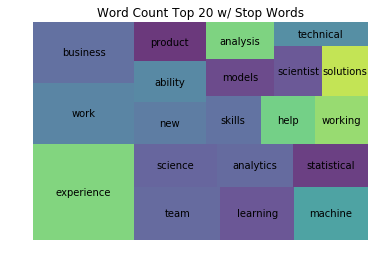

In [21]:
import squarify

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Word Count Top 20 w/ Stop Words')
plt.show()

C:\Users\Stephanie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


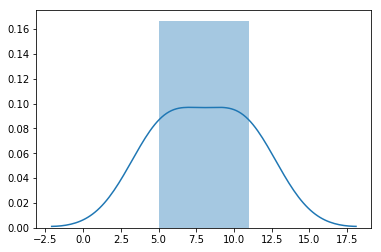

In [22]:
doc_len = [len(doc) for doc in df]

import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich,ﬁeld,ﬁnd,ﬁndings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [24]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [25]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.27841777, 1.31011584, 1.31817281, 1.31919977]]),
 array([[  0, 276, 274, 338, 366]], dtype=int64))

In [26]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [27]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[276]])

(array([[0.        , 1.01893529, 1.07128668, 1.21626608, 1.24009301]]),
 array([[276, 301, 392, 327, 201]], dtype=int64))

In [28]:
df['description'][276]

"facebook's mission is to give people the power to build community and bring the world closer together. through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. whether we're creating new products or helping a small business expand its reach, people at facebook are builders at heart. our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. together, we can help people build stronger communities — we're just getting started. the infrastructure strategy group is responsible for the strategic analysis to support and enable the continued growth critical to facebook’s infrastructure organization. the ideal candidate will be passionate about facebook, have strong analytical and modeling aptitude and has experience u

In [29]:
job_desc = [''' Jr Developer role beginner great first job career data scientist start''']

In [30]:
new = tfidf.transform(job_desc)

In [31]:
new

<1x8400 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [32]:
nn.kneighbors(new.todense())

(array([[1.19752471, 1.30735274, 1.30782072, 1.31757242, 1.31757242]]),
 array([[ 17, 331,  19, 184, 147]], dtype=int64))

In [33]:
df['description'][17]

'contractwe are looking to hire for a data scientist (remote).  qualifications: this job is for a data scientist who is an expert in python. developer should also have basic experience with postgres database. goal is to develop a general purpose script that creates various models for user imported datasets and choose the best model for making predictions. must be american citizen/authorized to work in us.  overview of work : developer will be working on an already built product that requires new features and bug fixing . self testing and bug fixing is an important part of the job. product is a tool that automates machine learning and makes natural language search and predictions on user imported data. developer will be working on a flexible schedule. he will be part of a remotely working team collaborating through skype and needs to take part in daily calls.  job type: contract to hire'

In [34]:
df['description'][331]

"position summary  we are looking for a passionate, detail-oriented jr. data scientist to join our data science team. the successful candidate be responsible for identifying and developing solutions to turn data into actionable business recommendations. you will need to exhibit a strong combination of analytical prowess, technical aptitude and business judgment. you will be expected to focus on results, be a self-starter and demonstrate success in using analytics to drive the understanding, progression and excellence in product and operations.  as a jr. data scientist, you will be the analytical partner for our media and product teams. you will work closely with campaign strategists, developers and product managers to transform subjective discussions about product into concise analytic questions that deliver actionable answers. you will support the design, development, and execution of marketing campaign analysis and game design including managing data and processes, modeling, and anal

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 